In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import unicodedata
import re
from ast import literal_eval
import string
import numpy as np
from tools.ftx_price_data import GetFTXPriceData
from scipy.stats import spearmanr

In [13]:
def cleanup(content):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', content)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
df = pd.read_csv(r'/Users/jakubzmujdzin/Desktop/repo/luna-nlp-paper/luna_tweets_sentiment_all.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df_grpd = df.groupby(by=pd.Grouper(key='date', freq='4H')).mean()

In [7]:
plt.rcParams["figure.figsize"] = (8,6)

<AxesSubplot:xlabel='bert', ylabel='Count'>

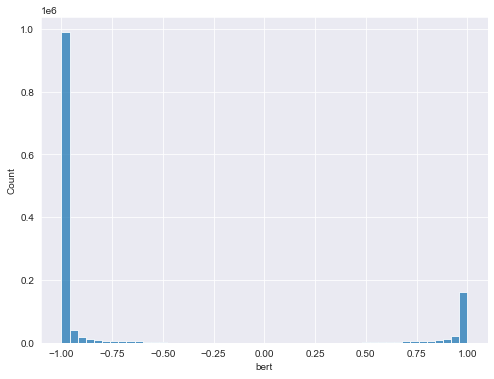

In [8]:
sns.histplot(df.bert, bins=50)

<AxesSubplot:xlabel='vader', ylabel='Count'>

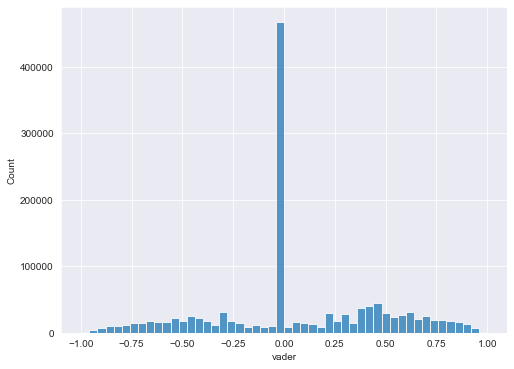

In [9]:
sns.histplot(df.vader, bins=50)

In [10]:
words = cleanup(''.join(str(df['content'].tolist())))

In [11]:
bigram = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:50]
trigram = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:50]

KeyboardInterrupt: 

In [ ]:
bigram.sort_values().plot.barh(color='#7286FB', width=.9, figsize=(12, 8))

In [ ]:
trigram.sort_values().plot.barh(color='#7286FB', width=.9, figsize=(12, 8))

In [ ]:
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
def cleanup_data(tweet_content):
    """Lemmatize, remove links and punctuaction"""
    return [lemmatizer.lemmatize(word) for word in
            [word for word in
             re.split('\W+', re.sub('[0-9]+', '',
                                    ''.join([char for char in re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', tweet_content)
                                             if char not in string.punctuation]))) if word not in stopwords]]
df['processed_content'] = df['content'].apply(lambda x: cleanup_data(x))

In [ ]:
#df['processed_content'] = df.processed_content.apply(lambda x: literal_eval(x))
df['processed_str'] = df['processed_content'].apply(lambda x: ' '.join([str(word).lower() for word in x]))

In [ ]:
ngrams_list = [['hotel', 'del', 'luna']]
sus_list = [['price', 'target', 'next'], ['miss', 'next', 'move'], ['dont', 'miss', 'next'], ['cryptowhales', 'saveluna', 'luna'], ['lunar', 'flying', 'luna'], ['except', 'btc', 'eth', 'beta'], ['mention', 'updated', 'every'], ['hotel', 'del', 'luna']]

In [ ]:
def check_for_ngrams(sentence, ngram):
    return 1 if all(sentence.split().__contains__(wrd) for wrd in ngram) else 0
df['ngram_count'] = df['processed_str'].apply(lambda sentence: np.sum([check_for_ngrams(sentence, ngram) for ngram in ngrams_list]))

/Users/jakubzmujdzin/Desktop/repo/luna-nlp-paper/tools/ftx_price_data.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df.drop_duplicates()[


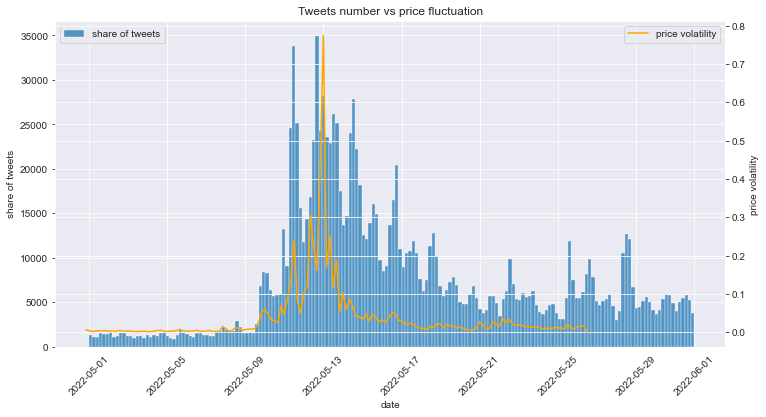

In [25]:
plt.rcParams["figure.figsize"] = (12,6)
p_df = GetFTXPriceData('15 m', '01/05/22', '31/05/22').get_candlestick_data()
p_df['volatility'] = abs(p_df['open'] - p_df['close'])/p_df['close']
agg_1d = p_df.groupby(pd.Grouper(key='date', freq='4h')).aggregate(np.mean)
sns.histplot(df.date)
plt.xticks(rotation=45)
plt.ylabel('share of tweets')
plt.xlabel('date')
plt.title('Tweets number vs price fluctuation')
plt.legend(['share of tweets'], loc='upper left')
ax2 = plt.twinx()
sns.lineplot(x=agg_1d.index, y=agg_1d.volatility, ax=ax2, color='orange')
plt.ylabel('price volatility')
ax2.legend(['price volatility'], loc='upper right')

In [33]:
df_grpd_s = df.groupby(by=pd.Grouper(key='date', freq='4H')).sum()
agg_4h = p_df.groupby(pd.Grouper(key='date', freq='4h')).aggregate(np.mean)

In [40]:
dff = df_grpd_s.merge(agg_4h, left_index=True, right_index=True)

In [41]:
spearmanr(dff['volatility'], dff['count'])

SpearmanrResult(correlation=0.8898846611014126, pvalue=1.1213710717650523e-53)

In [47]:
df_grpd.head()

,Unnamed: 0,Unnamed: 0.1,replyCount,retweetCount,likeCount,quoteCount,bert,vader
date,,,,,,,,
2022-05-01 00:00:00+00:00,55350.5,225821.572000,0.905600,1.564000,5.151200,0.201600,-0.362655,0.164533
2022-05-01 04:00:00+00:00,54181.5,220943.009191,1.659007,1.579044,6.480699,0.090993,-0.347520,0.168675
2022-05-01 08:00:00+00:00,53107.5,216691.606604,0.998113,1.240566,7.534906,0.152830,-0.460664,0.200628
2022-05-01 12:00:00+00:00,51823.5,211360.309682,2.689655,1.948939,11.293103,0.225464,-0.399421,0.182794
2022-05-01 16:00:00+00:00,50330.0,205765.038540,1.597701,3.170385,23.736984,0.220419,-0.360272,0.194138


/Users/jakubzmujdzin/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jakubzmujdzin/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:label='aa259560-8b44-4976-85c1-14d46e488400', xlabel='date', ylabel='bert'>

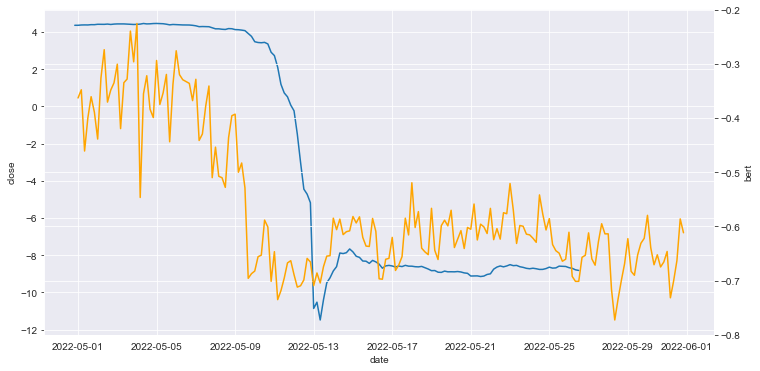

In [51]:
sns.lineplot(agg_4h.index, np.log(agg_4h.close))
ax2 = plt.twinx()
sns.lineplot(df_grpd.index, df_grpd.bert, ax=ax2, color='orange')

In [54]:
dff_1 = agg_4h.merge(df_grpd, left_index=True, right_index=True)
spearmanr(dff_1['bert'], dff_1['close'])

SpearmanrResult(correlation=0.6279224886435514, pvalue=2.8871558116378995e-18)

In [31]:
df['count'] = 1

In [32]:
df_grpd_s = df.groupby(by=pd.Grouper(key='date', freq='4H')).sum()
agg_4h = p_df.groupby(pd.Grouper(key='date', freq='4h')).aggregate(np.mean)

In [91]:
for i in range(100):
    print(df[df.ngram_count>0]['content'].iloc[i] + '\n' + '-'*100)

I've just watched episode S01 | E10 of Hotel Del Luna! https://t.co/YTOuBcaEhn #tvtime https://t.co/sXGkrc6XVA
----------------------------------------------------------------------------------------------------
@abduxuelis Hotel del Luna, Tomorrow, 25 21, las inclemencias del amor, Lawness Lawyer, It's okey not to be okey, El amor es como el cha cha cha
----------------------------------------------------------------------------------------------------
just finished hotel del luna &amp; now my heart hurts so much😭😭😭😭😭
----------------------------------------------------------------------------------------------------
So I'm watching vagabond and also simultaneously started hotel del Luna and coincidentally both the shows have the actors from mouse. The main lead from mouse plays the main lead in vagabond and the child actor who played the main lead in mouse also plays the same in hdl
----------------------------------------------------------------------------------------------------
i